### adult.csv Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96

### Description of Features:
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
14. hours-per-week: continuous.
15. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
16. income: >50K, <=50K

### Missing Values:
7% rows have missing values.

### Class Distribution:
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) 

### Number of Instances
    48842 instances, mix of continuous and discrete (train=32561, test=16281)
    45222 if instances with unknown values are removed (train=30162, test=15060)
    Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

### Number of Attributes
6 continuous, 8 nominal attributes. 

# Step 1: Getting Things Ready

In [1]:
#importing required modules

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#we have '?' representing missing values
missing=['?']

#load the data
adult_df=pd.read_csv("data/adult.csv", na_values=missing)

adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K



* <b>Since no column is having a big ammount of null values it would be better to remove row with Nan value</b>


* <b>Also data provided is big enough as compared to that of number of missing values dropping seems to be an option to use in place to puting mean of data in column. </b>

In [3]:
adult_df.info()
#Dtype is same as coresponding column type, hence NO missing values representation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#lets Delete rows with missing values

adult_df.dropna(inplace=True)
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [5]:
per=(1-(adult_df.shape[0]/48842))*100
print('percentage of rows deleted: {}'.format(per))

percentage of rows deleted: 7.411653904426519


* <b>Now the data looks good, but still require more touch ups like . . .  </b>

# Step 2: Data Preparation

In [6]:
#Droping 'fnlwgt' column

adult_df.drop('fnlwgt', axis=1, inplace=True)
adult_df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


* 'fnlgwt' is of no good use

In [7]:
#Now separate the dataFrame in numerical and categorical feaures

num_df=adult_df.select_dtypes(include=('int64'))
cat_df=adult_df.select_dtypes(include=('object'))

In [8]:
num_df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
cat_df.describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


 * <b>Now the data is divided into numerical and catrgorical features</b>  

In [10]:
#Normalizing numerical dataFrame
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler=StandardScaler()
std_num_df=pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
std_num_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


<b>Now, Used StandardScaler on Numerical data to Standadize the data.</b>


Note: MinMaxScaler is used to Normalize the data

In [11]:
encoder=OneHotEncoder(drop='first',sparse=False)

"""
Description about params in OneHotEncoder
sparse:->
Will return sparse matrix if set True else will return an array.

drop:-> 
None : retain all features (the default).
* ‘first’ : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.
* ‘if_binary’ : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.
* array : drop[i] is the category in feature X[:, i] that should be dropped.
"""

en_cat_df = pd.DataFrame(encoder.fit_transform(cat_df), 
                      columns=encoder.get_feature_names(cat_df.columns))
en_cat_df.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<b>Converted the Categorical data to numerical form so that models can be used on them</b>

In [12]:
#merge both dataFrames
df=pd.concat([std_num_df,en_cat_df],axis=1)
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<b>Finally, a new data is genrated by merging both numerical and categorical features, for further utillization</b>

In [13]:
#Split data

Y=df.pop('income_>50K')
X=df

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)


<b>Since Income is the target variable or what the task is to find, we seprate it and delete from the data</b>


Also, observe that 1 and 0 in 'income_>50K' means:
    * 1: we have income >50,000
    * 0: we have income <= 50,000

# Step 3: Model

In [14]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)


LogisticRegression(max_iter=500)

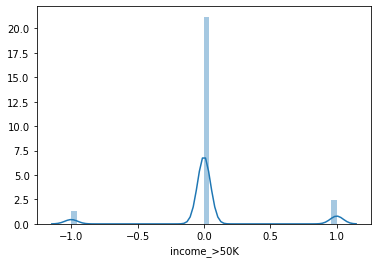

In [15]:
res=Y_train-model.predict(X_train)
sb.distplot(res)

<b>Looks like there are some errors in prediction of income, but are seem to be low as compared to correct predictions.

# Step 4: Predictions

In [16]:
pred=model.predict(X_test)

pd.DataFrame({'pred':pred,'actual':Y_test}).head()

,pred,actual
40273,0.0,0.0
1984,0.0,1.0
1230,0.0,1.0
25507,0.0,0.0
553,1.0,0.0


# Step 5: Evaluation

In [17]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, pred))

print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error:  0.15058598068843518
Mean Squared Error:  0.15058598068843518
Root Mean Squared Error:  0.38805409505433025


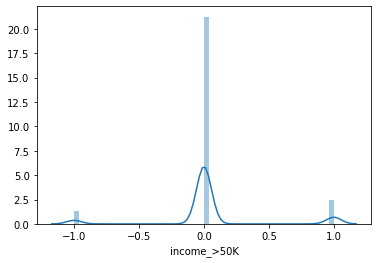

In [18]:
res=Y_test-pred
sb.distplot(res)

In [19]:
print('R2 Score:{} '.format(metrics.r2_score(Y_test, pred)))
print('Accuracy:{}'.format(metrics.accuracy_score(Y_test,pred)))
print('Precision:{}'.format(metrics.precision_score(Y_test,pred)))
print('Recall:{}'.format(metrics.recall_score(Y_test,pred)))

R2 Score:0.19116122403694424 
Accuracy:0.8494140193115648
Precision:0.7407407407407407
Recall:0.601907032181168


<b>
    Model is able to classifiy/predict income with 84 % accuracy

In [20]:
print(metrics.classification_report(Y_test,pred))
#Number of Features = 95

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



<b>
    Here we have some representaion of TP,TN,FP and FN
    where,
    
    * TP: True Positive
    * FP: False Positive
    * FN: False Negetive
    * TN: True Negative
   
   It is in this form
   
   TP FP<br>
   FN TN

In [21]:
confuse=metrics.confusion_matrix(Y_test,pred)
print(confuse)

[[9504  707]
 [1336 2020]]


In [22]:
print("So, we are identifying {0} points correctly out of {1}".format(confuse[0][0]+confuse[1][1],sum(map(sum,confuse))))

So, we are identifying 11524 points correctly out of 13567


# Step 6: RFE to extract best features

In [23]:
from sklearn.feature_selection import RFE

rfe=RFE(model)
rfe=rfe.fit(X_test,Y_test)


In [24]:
rfe_df=pd.DataFrame({'Support':rfe.support_,'Rank':rfe.ranking_,'Feature':X_test.columns})
cols=list(rfe_df.loc[rfe_df['Support'],'Feature'])
len(cols)
#So out of 95 features 47 features are capable to perform the same (somewhat)

47

<b>
    RFE identified that there are 47 columns have a high co-relation than that of all 95 features, Let's list these features  

In [25]:
rfe_df.loc[rfe_df['Support'],'Feature']

0                                           age
1                               educational-num
2                                  capital-gain
5                           workclass_Local-gov
6                             workclass_Private
7                        workclass_Self-emp-inc
8                    workclass_Self-emp-not-inc
9                           workclass_State-gov
10                        workclass_Without-pay
24                        education_Prof-school
26             marital-status_Married-AF-spouse
27            marital-status_Married-civ-spouse
28         marital-status_Married-spouse-absent
29                 marital-status_Never-married
34                   occupation_Exec-managerial
35                   occupation_Farming-fishing
36                 occupation_Handlers-cleaners
37                 occupation_Machine-op-inspct
38                     occupation_Other-service
39                   occupation_Priv-house-serv
40                    occupation_Prof-sp

<b>
    Here, we can use general common sense and EDA to identify that out of these feature, clearly make sense to income. That is, for example 'gender' clearly is related to income (by EDA in previous assignment) in the sense that female are able to generate income >50K as compared to males in the data. smae can be said about age, country, occupation, etc.

In [26]:
# Lets train model on these 47 features

X=X.loc[:,cols]

# train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)

pred=model.predict(X_test)

In [27]:
print('-'*40+'Errors'+'-'*40)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

print('-'*40+'Scores'+'-'*40)
print('R2 Score:{} '.format(metrics.r2_score(Y_test, pred)))
print('Accuracy:{}'.format(metrics.accuracy_score(Y_test,pred)))
print('Precision:{}'.format(metrics.precision_score(Y_test,pred)))
print('Recall:{}'.format(metrics.recall_score(Y_test,pred)))

----------------------------------------Errors----------------------------------------
Mean Absolute Error:  0.15589297560256504
Mean Squared Error:  0.15589297560256504
Root Mean Squared Error:  0.3948328451415422
----------------------------------------Scores----------------------------------------
R2 Score:0.16265589272547099 
Accuracy:0.8441070243974349
Precision:0.7323099962560838
Recall:0.5828367103694875


<b>
    Clearly 47 features which are corelated to income are able to perform the same as to 95 features. GREAT

In [28]:
print(metrics.classification_report(Y_test,pred))
#Number of Features = 47

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.73      0.58      0.65      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.77     13567
weighted avg       0.84      0.84      0.84     13567



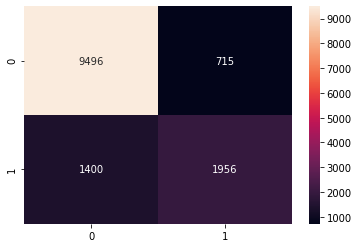

In [29]:
confuse=metrics.confusion_matrix(Y_test,pred)
sb.heatmap(confuse,annot=True,fmt='g')

In [30]:
print("So, we are identifying {0} points correctly out of {1}".format(confuse[0][0]+confuse[1][1],sum(map(sum,confuse))))

So, we are identifying 11452 points correctly out of 13567


<b>
    Error by RFE has increased but can be acceptable as compared to number of features reduced.

# Step 7: PCA

<b>
    Recursive Feature Elimination, though great, but takes time to perform compution which could be managed by limiting the selection of features but it is hassel to not able to see the impact by those many features in prediction.
    
    
    There PCA might be helpfull

In [31]:
from sklearn.decomposition import PCA
pca=PCA()
X=df
pca.fit(X)
print(pca.explained_variance_ratio_)

[1.72312138e-01 1.26968446e-01 1.19318570e-01 1.04286030e-01
 9.83263346e-02 4.66020388e-02 2.97348043e-02 2.59978785e-02
 2.58936662e-02 2.07352878e-02 1.85760841e-02 1.79453436e-02
 1.55990825e-02 1.41337786e-02 1.33870341e-02 1.15367798e-02
 1.06894278e-02 1.04651644e-02 9.45423949e-03 8.49258924e-03
 7.48848337e-03 7.23734796e-03 6.48296320e-03 5.99758547e-03
 5.43991846e-03 5.04669239e-03 4.43540573e-03 4.15701799e-03
 4.05403715e-03 3.96344612e-03 3.85374661e-03 3.47045435e-03
 3.39304654e-03 3.33519609e-03 3.01573716e-03 2.35260942e-03
 2.30792512e-03 2.19545161e-03 1.91414952e-03 1.67083249e-03
 1.59129399e-03 1.51035045e-03 1.24742135e-03 1.21533282e-03
 1.11035860e-03 1.00084884e-03 7.30781111e-04 6.42636173e-04
 5.97866144e-04 5.33544983e-04 4.78238710e-04 4.31789661e-04
 3.95233544e-04 3.57374260e-04 3.51777218e-04 3.24727878e-04
 3.09831946e-04 2.90110019e-04 2.75192451e-04 2.56158010e-04
 2.54799409e-04 2.40966889e-04 2.36124449e-04 2.31390732e-04
 2.20572130e-04 2.132763

[]

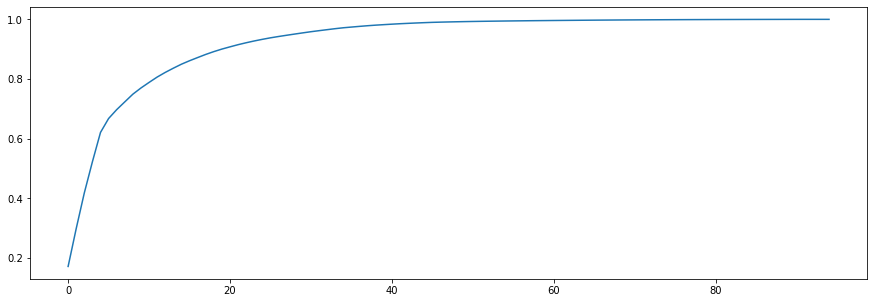

In [32]:
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot()

<b>
    Here,  visually it can be seen that selecting 40 to 25 features we can achieve very good variance.
    let's go with 27 features. 

In [33]:
pca=PCA(n_components=27)
X_pca=pca.fit_transform(X)
X_pca.shape

(45222, 27)

In [34]:
# train test split
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y,train_size=0.7,random_state=100)

model=LogisticRegression()
model.fit(X_train,Y_train)

pred=model.predict(X_test)

----------------------------------------Errors----------------------------------------
Mean Absolute Error:  0.15301835335741137
Mean Squared Error:  0.15301835335741137
Root Mean Squared Error:  0.3911756042462405


----------------------------------------Scores----------------------------------------
R2 Score:0.1780962805191857 
Accuracy:0.8469816466425887
Precision:0.7361623616236163
Recall:0.5944576877234803
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.74      0.59      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



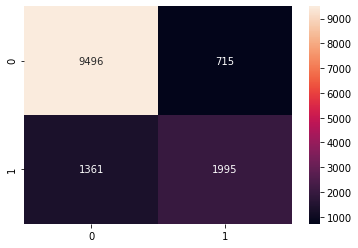

In [35]:
print('-'*40+'Errors'+'-'*40)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('\n')
print('-'*40+'Scores'+'-'*40)
print('R2 Score:{} '.format(metrics.r2_score(Y_test, pred)))
print('Accuracy:{}'.format(metrics.accuracy_score(Y_test,pred)))
print('Precision:{}'.format(metrics.precision_score(Y_test,pred)))
print('Recall:{}'.format(metrics.recall_score(Y_test,pred)))

print(metrics.classification_report(Y_test,pred))

confuse=metrics.confusion_matrix(Y_test,pred)
sb.heatmap(confuse,annot=True,fmt='g')

In [36]:
print("So, we are identifying {0} points correctly out of {1}".format(confuse[0][0]+confuse[1][1],sum(map(sum,confuse))))

So, we are identifying 11491 points correctly out of 13567


<b>
    PCA did what RFE could do (somewhat better) but with lesser feature consideration.
    
    
    Lets try PCA on other classification models and compare there accuracy too.

# PCA with KNN

----------------------------------------Errors----------------------------------------
Mean Absolute Error:  0.16960271246406722
Mean Squared Error:  0.16960271246406722
Root Mean Squared Error:  0.41182849884881356


----------------------------------------Scores----------------------------------------
R2 Score:0.08901712017083152 
Accuracy:0.8303972875359328
Precision:0.6735768344850279
Recall:0.6099523241954709
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     10211
         1.0       0.67      0.61      0.64      3356

    accuracy                           0.83     13567
   macro avg       0.77      0.76      0.76     13567
weighted avg       0.83      0.83      0.83     13567



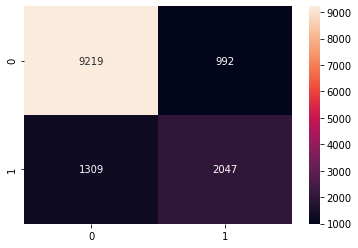

In [37]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

#Lets do Prediction
pred_knn = knn.predict(X_test)

print('-'*40+'Errors'+'-'*40)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, pred_knn))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, pred_knn))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, pred_knn)))
print('\n')
print('-'*40+'Scores'+'-'*40)
print('R2 Score:{} '.format(metrics.r2_score(Y_test, pred_knn)))
print('Accuracy:{}'.format(metrics.accuracy_score(Y_test,pred_knn)))
print('Precision:{}'.format(metrics.precision_score(Y_test,pred_knn)))
print('Recall:{}'.format(metrics.recall_score(Y_test,pred_knn)))

print(metrics.classification_report(Y_test,pred_knn))


confuse=metrics.confusion_matrix(Y_test,pred_knn)
sb.heatmap(confuse,annot=True,fmt='g')

In [38]:
print("So, we are identifying {0} points correctly out of {1}".format(confuse[0][0]+confuse[1][1],sum(map(sum,confuse))))

So, we are identifying 11266 points correctly out of 13567


<b>
    Error associated with this model is very high than usual

# PCA with Decision Tree

----------------------------------------Errors----------------------------------------
Mean Absolute Error:  0.19643252008550158
Mean Squared Error:  0.19643252008550158
Root Mean Squared Error:  0.443207084877376


----------------------------------------Scores----------------------------------------
R2 Score:-0.05509316590383917 
Accuracy:0.8035674799144984
Precision:0.6083411727814362
Recall:0.5780691299165673
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10211
         1.0       0.61      0.58      0.59      3356

    accuracy                           0.80     13567
   macro avg       0.74      0.73      0.73     13567
weighted avg       0.80      0.80      0.80     13567



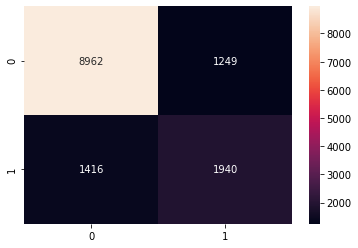

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

#Prediction
pred_dt=dt.predict(X_test)

#Evaluation
print('-'*40+'Errors'+'-'*40)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, pred_dt))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, pred_dt))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, pred_dt)))
print('\n')
print('-'*40+'Scores'+'-'*40)
print('R2 Score:{} '.format(metrics.r2_score(Y_test, pred_dt)))
print('Accuracy:{}'.format(metrics.accuracy_score(Y_test,pred_dt)))
print('Precision:{}'.format(metrics.precision_score(Y_test,pred_dt)))
print('Recall:{}'.format(metrics.recall_score(Y_test,pred_dt)))

print(metrics.classification_report(Y_test,pred_dt))


confuse=metrics.confusion_matrix(Y_test,pred_dt)
sb.heatmap(confuse,annot=True,fmt='g')

In [40]:
print("So, we are identifying {0} points correctly out of {1}".format(confuse[0][0]+confuse[1][1],sum(map(sum,confuse))))

So, we are identifying 10902 points correctly out of 13567


<b>
Something wiered can be observed in R2 score as it is '-ve', this signifies Decision Tree is the worst model to select for this data. This is because DT model is generating a classification which not making sense with test data. 

# PCA with SVM

In [ ]:
from sklearn import svm

svc=svm.SVC()
svc.fit(X_train,Y_train)

In [ ]:
pred_svc=svc.predict(X_test)

#Evaluation
print('-'*40+'Errors'+'-'*40)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, pred_svc))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, pred_svc))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, pred_svc)))

print('-'*40+'Scores'+'-'*40)
print('R2 Score:{} '.format(metrics.r2_score(Y_test, pred_svc)))
print('Accuracy:{}'.format(metrics.accuracy_score(Y_test,pred_svc)))
print('Precision:{}'.format(metrics.precision_score(Y_test,pred_svc)))
print('Recall:{}'.format(metrics.recall_score(Y_test,pred_svc)))

print(metrics.classification_report(Y_test,pred_svc))

confuse=metrics.confusion_matrix(Y_test,pred_svc)
sb.heatmap(confuse,annot=True,fmt='g')

In [ ]:
print("So, we are identifying {0} points correctly out of {1}".format(confuse[0][0]+confuse[1][1],sum(map(sum,confuse))))

<b>
SVM seems to be the best model for this dataset

<b>
   information gathered can be summurized as follows with PCA:
    
    Logistic: 
    we are identifying 11493 points correctly out of 13567
    acc: 84.71290631679811 %
    
    KNN: 
    we are identifying 11268 points correctly out of 13567
    acc: 83.05447040613253 %
    
    Decision Tree: 
    we are identifying 10892 points correctly out of 13567
    acc: 80.28303972875359 %
    
    SVC:
    we are identifying 11547 points correctly out of 13567
    acc:85.11093093535785 %

# Conslusion
* So, it seems like SVM and logistic regression are providing better results as compared to other models.
* But, SVM is taking a lot time as compared to that of Logistic regression. So, time can be a crucial parameter to determine wheter to use Logistic or Support Vector Machine
* For entire time, prediction are not reaching more than 90% accuracy, which could mean dataset may contains outliers, or data given is maybe inconsistent 
* PCA and RFE are somewhat providing same results but, in terms of time complexity and ease to use (visually) PCA is good option.
* Number of features by RFE could be largly reduced as what can be seen in PCA like near to 20 or 30 features to achieve similar results.
* Another important point is that precission and recall, as here it seems to be having low recall than that of higher precission, so all models are classifying lesser number of relevant results than the actual relevant points in test data. This could mean that our test case has more number of negative points or income<=50K on which models are able to classify more greatly.   

In [ ]:
Y.value_counts()